In [1]:
print("hello")

hello


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np

#phle folder ka path fhir file ka namm .csv
df=pd.read_csv("C:/Users/mayank/Downloads/BlinkitData/BlinkIT Grocery Data.csv")
df

,Item_Fat_Content,Item_Identifier,Item_Type,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location,Outlet_Size,Outlet_Type,Visibility,Weight,Sales,Rating
0,Regular,FDX32,Fruits and Vegetables,2012,OUT049,Tier 1,Medium,Supermarket Type1,0.100014,15.10,145.4786,5.0
1,Low Fat,NCB42,Health and Hygiene,2022,OUT018,Tier 3,Medium,Supermarket Type2,0.008596,11.80,115.3492,5.0
2,Regular,FDR28,Frozen Foods,2016,OUT046,Tier 1,Small,Supermarket Type1,0.025896,13.85,165.0210,5.0
3,Regular,FDL50,Canned,2014,OUT013,Tier 3,High,Supermarket Type1,0.042278,12.15,126.5046,5.0
4,Low Fat,DRI25,Soft Drinks,2015,OUT045,Tier 2,Small,Supermarket Type1,0.033970,19.60,55.1614,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,low fat,NCT53,Health and Hygiene,2018,OUT027,Tier 3,Medium,Supermarket Type3,0.000000,0.00,164.5526,4.0
8519,low fat,FDN09,Snack Foods,2018,OUT027,Tier 3,Medium,Supermarket Type3,0.034706,0.00,241.6828,4.0
8520,low fat,DRE13,Soft Drinks,2018,OUT027,Tier 3,Medium,Supermarket Type3,0.027571,0.00,86.6198,4.0
8521,reg,FDT50,Dairy,2018,OUT027,Tier 3,Medium,Supermarket Type3,0.107715,0.00,97.8752,4.0


In [3]:
df.shape

(8523, 12)

In [4]:
df.columns

Index(['Item_Fat_Content', 'Item_Identifier', 'Item_Type',
       'Outlet_Establishment_Year', 'Outlet_Identifier', 'Outlet_Location',
       'Outlet_Size', 'Outlet_Type', 'Visibility', 'Weight', 'Sales',
       'Rating'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Fat_Content           8523 non-null   object 
 1   Item_Identifier            8523 non-null   object 
 2   Item_Type                  8523 non-null   object 
 3   Outlet_Establishment_Year  8523 non-null   int64  
 4   Outlet_Identifier          8523 non-null   object 
 5   Outlet_Location            8523 non-null   object 
 6   Outlet_Size                8523 non-null   object 
 7   Outlet_Type                8523 non-null   object 
 8   Visibility                 8523 non-null   float64
 9   Weight                     8523 non-null   float64
 10  Sales                      8523 non-null   float64
 11  Rating                     8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [6]:
df.describe().round(0)

,Outlet_Establishment_Year,Visibility,Weight,Sales,Rating
count,8523.0,8523.0,8523.0,8523.0,8523.0
mean,2016.0,0.0,11.0,141.0,4.0
std,3.0,0.0,6.0,62.0,1.0
min,2011.0,0.0,0.0,31.0,1.0
25%,2014.0,0.0,7.0,94.0,4.0
50%,2016.0,0.0,11.0,143.0,4.0
75%,2018.0,0.0,16.0,186.0,4.0
max,2022.0,0.0,21.0,267.0,5.0


In [7]:
df.isnull().sum()

Item_Fat_Content             0
Item_Identifier              0
Item_Type                    0
Outlet_Establishment_Year    0
Outlet_Identifier            0
Outlet_Location              0
Outlet_Size                  0
Outlet_Type                  0
Visibility                   0
Weight                       0
Sales                        0
Rating                       0
dtype: int64

In [8]:
df["Item_Fat_Content"].unique()

array(['Regular', 'Low Fat', 'low fat', 'LF', 'reg'], dtype=object)

In [9]:
df["Item_Fat_Content"]=df["Item_Fat_Content"].replace({"low fat":"Low Fat",
                                                       "LF":"Low Fat",
                                                       "reg":"Regular"})

In [10]:
df["Item_Fat_Content"].unique()

array(['Regular', 'Low Fat'], dtype=object)

In [11]:
total_sales=df["Sales"].sum()
average_sales=df["Sales"].mean()
number_of_items=df["Item_Type"].count()
average_rating=df["Rating"].mean()

print(f"Total Sales: ${total_sales:,.1f}")
print(f"Average Sales: ${average_sales:,.1f}")
print(f"Number of Items: {number_of_items:,.1f}")
print(f"Average Rating: {average_rating:,.1f}")


Total Sales: $1,201,681.5
Average Sales: $141.0
Number of Items: 8,523.0
Average Rating: 4.0


Item_Fat_Content
Low Fat    776319.69
Regular    425361.80
Name: Sales, dtype: float64


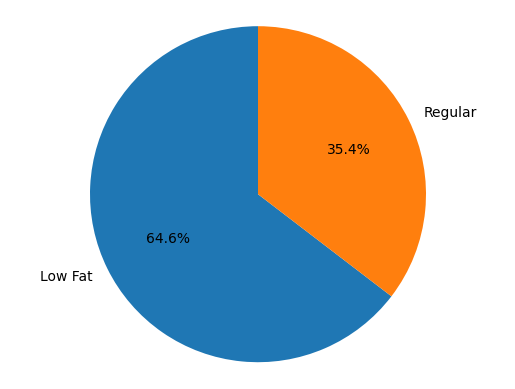

In [12]:
# total sales by fat content
sales_by_fat=df.groupby("Item_Fat_Content")["Sales"].sum().round(2)
print(sales_by_fat)
plt.pie(sales_by_fat, labels=sales_by_fat.index, autopct="%.1f%%", startangle=90)
title = "Sales by Fat content"
plt.title = title 
plt.axis("equal")  
plt.show()

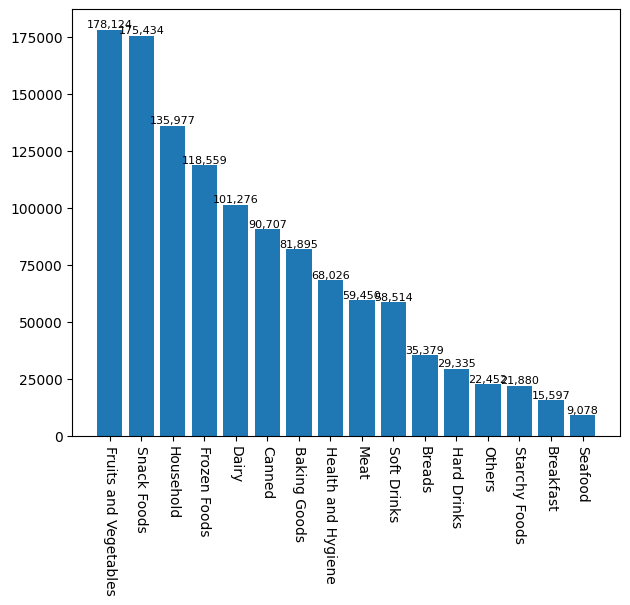

In [13]:
#total sales by item type
sales_by_type=df.groupby("Item_Type")["Sales"].sum().sort_values(ascending=False)
bars=plt.bar(sales_by_type.index, sales_by_type.values)
for bar in bars:
    plt.text(bar.get_x()+bar.get_width()/2, bar.get_height(), f"{bar.get_height():,.0f}",ha="center",va="bottom",fontsize=8)
plt.tight_layout()
plt.xticks(rotation=-90)
plt.show()


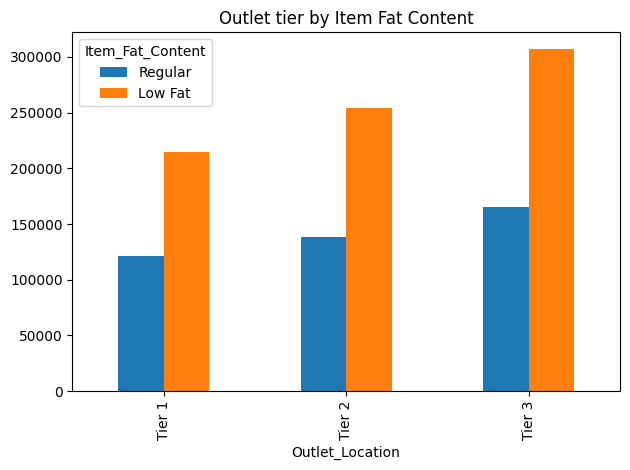

In [14]:
#fat content by outlet for total sales

grouped=df.groupby(["Outlet_Location","Item_Fat_Content"])["Sales"].sum().unstack()
grouped=grouped[["Regular","Low Fat"]]

ax=grouped.plot(kind="bar",title="Outlet tier by Item Fat Content")
plt.tight_layout()
plt.show()

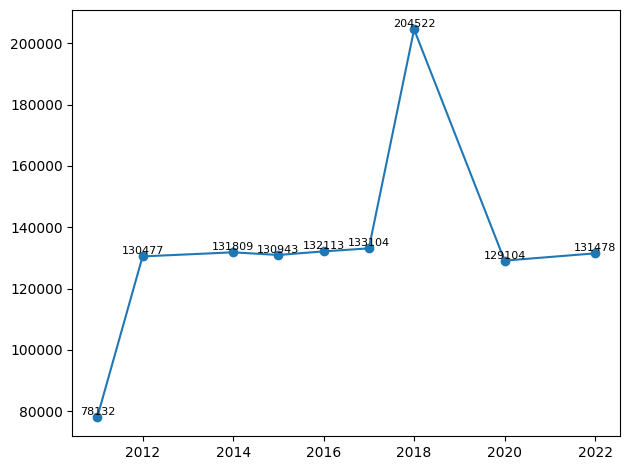

In [15]:
#total sales by outlet establishment

sales_by_year=df.groupby("Outlet_Establishment_Year")["Sales"].sum().sort_index()
plt.plot(sales_by_year.index, sales_by_year.values, marker="o",linestyle="-")

for x,y in zip(sales_by_year.index, sales_by_year.values):
    plt.text(x,y,f"{y:.0f}",ha="center",va="bottom",fontsize=8)
plt.tight_layout()
plt.show()

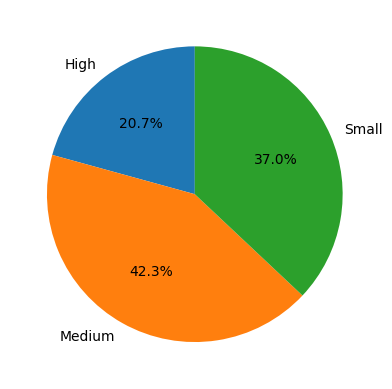

In [16]:
#sales by outlet size

sales_by_size=df.groupby("Outlet_Size")["Sales"].sum()
plt.pie(sales_by_size, labels=sales_by_size.index, autopct="%1.1f%%", startangle=90)
plt.show()

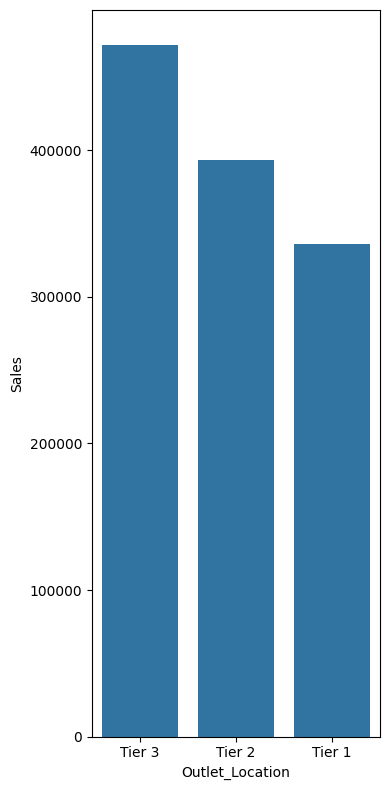

In [22]:
#sales by outlet location
  
sales_by_location=df.groupby("Outlet_Location")["Sales"].sum().reset_index()
sales_by_location=sales_by_location.sort_values("Sales", ascending=False)
plt.figure(figsize=(4,8))
ax=sb.barplot(data=sales_by_location,y="Sales",x="Outlet_Location")
plt.tight_layout()
plt.show()